(100, 100)


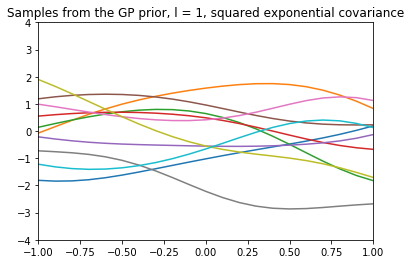

In [2]:
import matplotlib.pyplot as plt
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist

X = np.arange(-4, 6, 0.1).reshape(-1,1)
mu = np.zeros(X.shape)

def kernel(X1, X2, l=1.0, sigma_f=1.0):
    n = len(X1)
    m = len(X2)
    K = np.empty((n, m))
    for i in range(n):
        for j in range(m):
            K[i, j] = sigma_f**2 * np.exp(-(X1[i] - X2[j])**2 / l**2)
    return K


K = kernel(X, X, 1)
print(K.shape)
samples = np.random.multivariate_normal(mu.ravel(), K, 10)

for sample in samples:
    plt.plot(X, sample)
plt.axis([-1, 1, -4, 4])
plt.title('Samples from the GP prior, l = 1, squared exponential covariance')
plt.savefig("GPl1")
plt.show()

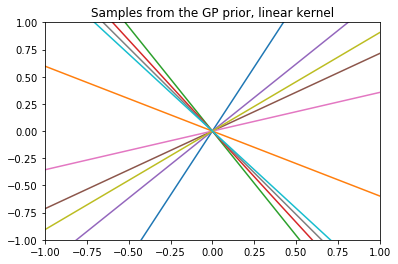

In [3]:
def linear_kernel(X1, X2):
    K = np.empty((len(X1), len(X2)))
    for i in range(len(X1)):
        for j in range(len(X2)):
            K[i, j] = X1[i] * X2[j]
    return K
    
K = linear_kernel(X, X)
samples = np.random.multivariate_normal(mu.ravel(), K, 10)

for sample in samples:
    plt.plot(X, sample)
plt.axis([-1, 1, -1, 1])
plt.title('Samples from the GP prior, linear kernel')
plt.savefig("GP_linear")
plt.show()

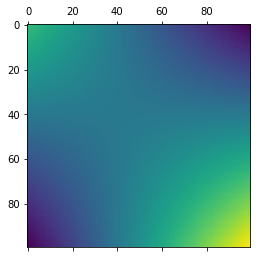

In [4]:
plt.matshow(K)

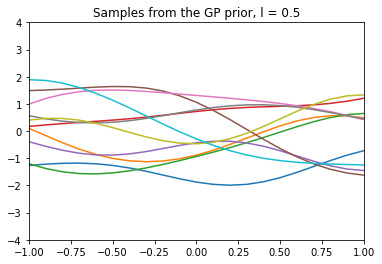

In [5]:
K = kernel(X, X, 1)

samples = np.random.multivariate_normal(mu.ravel(), K, 10)

for sample in samples:
    plt.plot(X, sample)
plt.axis([-1, 1, -4, 4])
plt.title('Samples from the GP prior, l = 0.5')
plt.show()

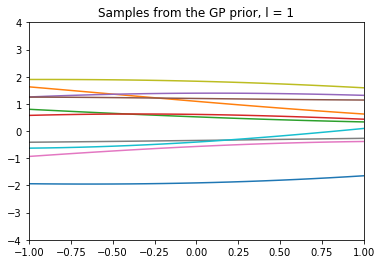

In [6]:
K = kernel(X, X, 5)

samples = np.random.multivariate_normal(mu.ravel(), K, 10)

for sample in samples:
    plt.plot(X, sample)
plt.axis([-1, 1, -4, 4])
plt.title('Samples from the GP prior, l = 1')
plt.show()

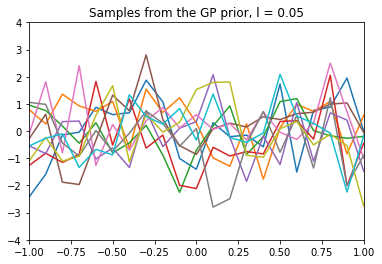

In [7]:
K = kernel(X, X, 0.05)

samples = np.random.multivariate_normal(mu.ravel(), K, 10)

for sample in samples:
    plt.plot(X, sample)
plt.axis([-1, 1, -4, 4])
plt.title('Samples from the GP prior, l = 0.05')
plt.show()

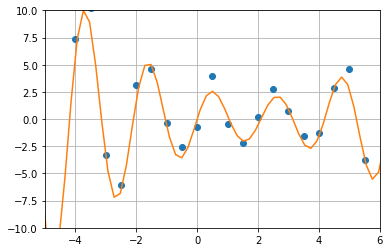

In [8]:
X_train = np.arange(-4, 6, 0.5)
sigma2 = 0.3
f = lambda x, e : (2 + (0.5 * x - 1)**2) * np.sin(3 * x) + e
y_train = []
tn_real = []
for x in X_train:
    y_train.append(f(x, np.random.normal(sigma2)))

y_train = np.array(y_train)
linspace = np.linspace(-10, 10, 100)
for x in linspace:
    tn_real.append(f(x, 0))#np.random.normal(sigma2)))

plt.plot(X_train, y_train, 'o')
plt.plot(linspace, tn_real)
plt.axis([-5, 6, -10, 10])
plt.grid()
plt.savefig("real_function")

### Remember our prior

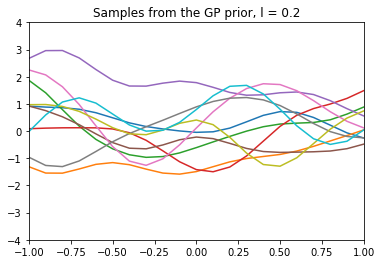

In [9]:
X = np.arange(-10, 10, 0.1).reshape(-1,1)
mu = np.zeros(X.shape)

K = kernel(X, X, 0.5)

samples = np.random.multivariate_normal(mu.ravel(), K, 10)

for sample in samples:
    plt.plot(X, sample)
plt.axis([-1, 1, -4, 4])
plt.title('Samples from the GP prior, l = 0.2')
plt.show()

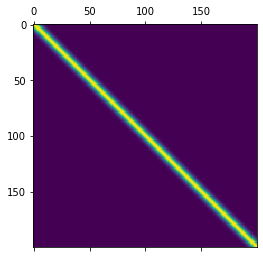

In [10]:
plt.matshow(K)

### Predictive posterior

In [11]:
def predictive_posterior(X_new, X_train, y_train, l, noise):
    k = kernel(X_new, X_train, l)
    C = kernel(X_train, X_train, l) + noise * np.eye(len(X_train))
    c = kernel(X_new, X_new) + noise * np.eye(len(X_new))
    mean = k.dot(np.linalg.inv(C)).dot(y_train)
    co = c - k.dot(np.linalg.inv(C)).dot(k.T)
    return mean, co
    
    

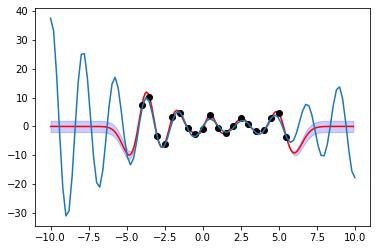

In [12]:
mu, co = predictive_posterior(X, np.reshape(X_train, (len(X_train), 1)), y_train, 1, 1e-12)
#print(co.shape)
samples = np.random.multivariate_normal(mu.ravel(), co, 1)
uncertainty = 1.96 * np.sqrt(np.diag(co))
plt.plot(X, mu, 'r')
plt.plot(X_train, y_train, 'ok')
plt.plot(linspace, tn_real)
plt.fill_between(X.ravel(), mu + uncertainty, mu - uncertainty, alpha=0.2, animated=True, color="b")
plt.savefig("gp_predictive_posterior_1_with_real")

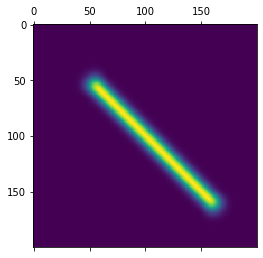

In [13]:
k = kernel(X, X_train)
C = kernel(X_train, X_train)+ 0 * np.eye(len(X_train))
plt.matshow(k.dot(np.linalg.inv(C)).dot(k.T))

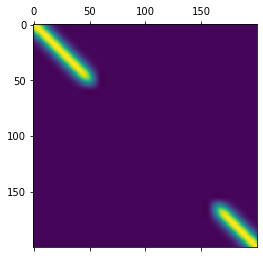

In [14]:
plt.matshow(co)

c:\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


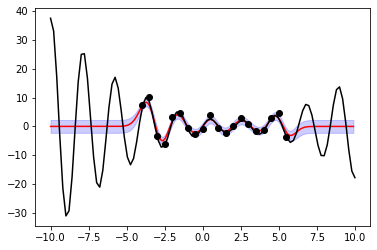

In [15]:
mu, co = predictive_posterior(X, np.reshape(X_train, (len(X_train), 1)), y_train, 0.7, 0.3)
samples = np.random.multivariate_normal(mu.ravel(), co, 1)
uncertainty = 1.96 * np.sqrt(np.diag(co))
plt.plot(X, mu, 'r')
plt.plot(X_train, y_train, 'ok')
plt.plot(linspace, tn_real, 'k')
plt.fill_between(X.ravel(), mu + uncertainty, mu - uncertainty, alpha=0.2, animated=True, color="b")
plt.savefig("gp_predictive_posterior_noise.png")

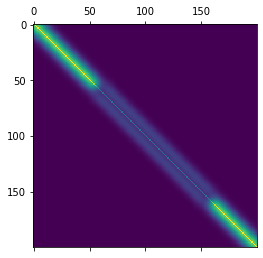

In [16]:
plt.matshow(co)